In [101]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from scipy import sparse
from scipy.sparse import csr_matrix
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [120]:
Total=pd.read_csv("train.csv")

In [121]:
Total.shape

(116058, 29)

In [122]:
Total.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [125]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(Total.isnull().any()))

No of Nan values in our dataframe :  0


In [126]:
dup_bool = Total.duplicated()
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [132]:
#Count of each label
Total["source"].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [128]:
#Count of each label
Total["financial_institution"].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [129]:
#Count of each label
Total["loan_purpose"].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [130]:
#Count of each label
Total["insurance_type"].value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

In [131]:
#Count of each label
Total["m13"].value_counts()

0    115422
1       636
Name: m13, dtype: int64

It's an highly imbalanced data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000291E728EB00>,
      dtype=object)

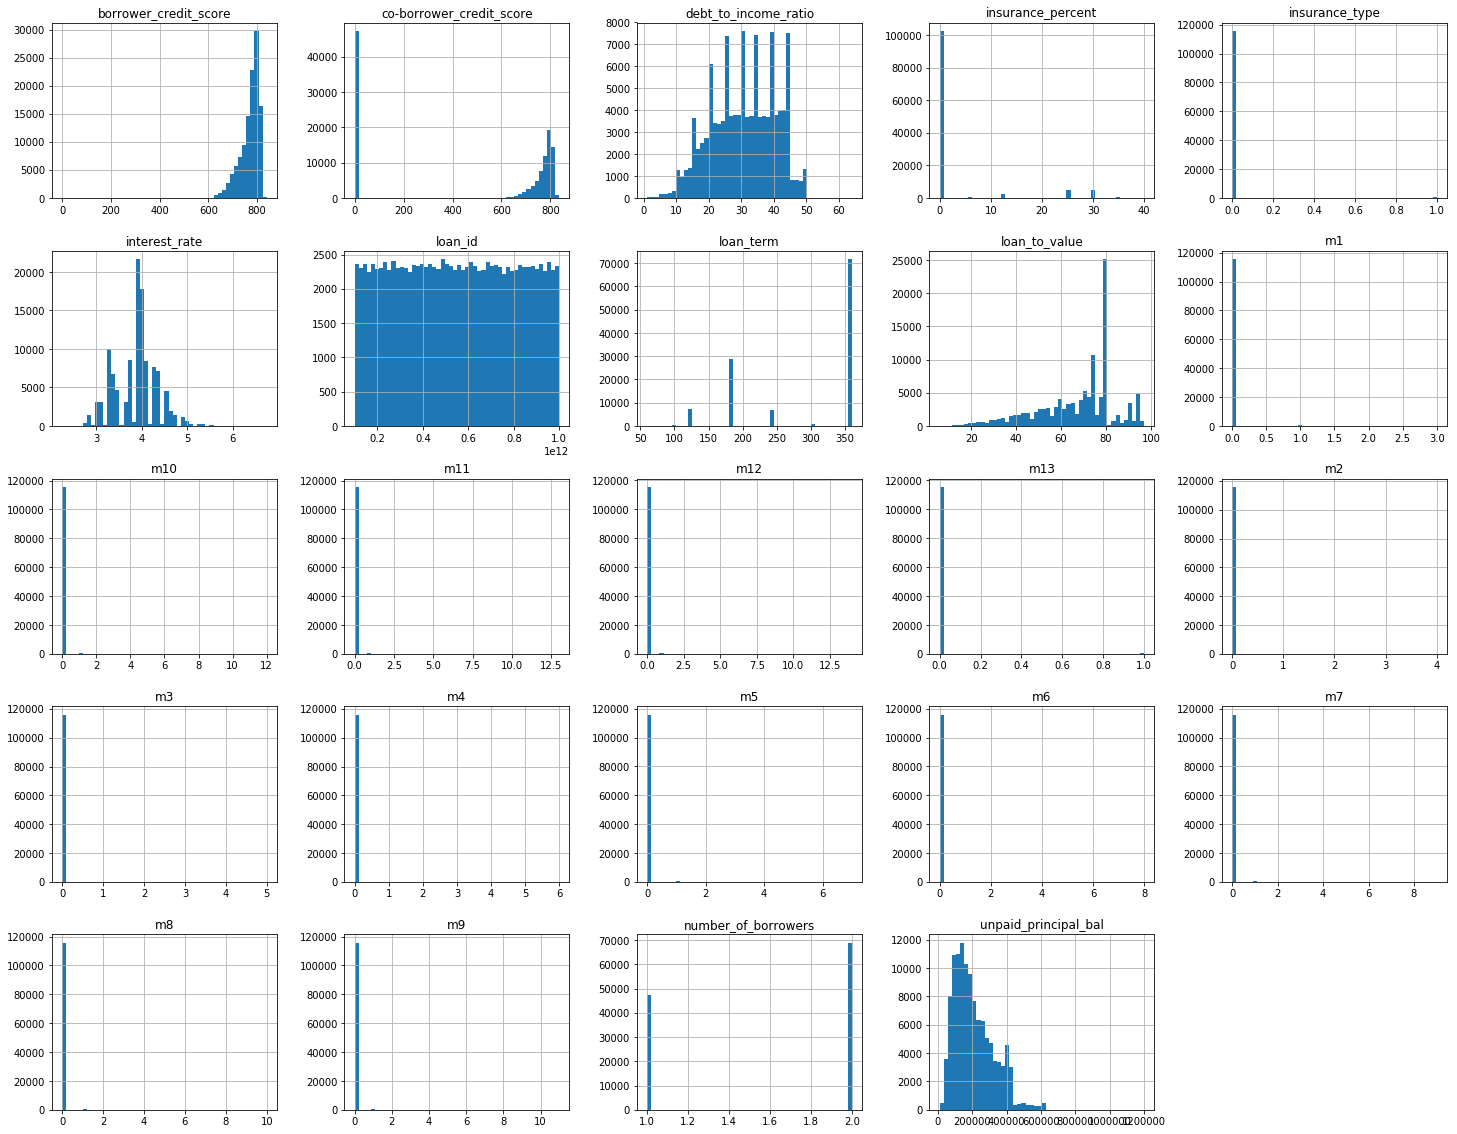

In [124]:
Total.hist(bins=50,figsize=(25,20))

Date modification 

In [4]:


list1=[]
for i in range(0,len(Total)):
    string1=Total["origination_date"][i]
    list1.append(string1[6])

Total["origination_date"]=list1

list1=[]
for i in range(0,len(Total)):
    string1=Total["first_payment_date"][i]
    list1.append(string1[1])

Total["first_payment_date"]=list1

Total['origination_date'] = Total['origination_date'].astype(int)
Total['first_payment_date'] = Total['first_payment_date'].astype(int)

Total["orgin-first"]=Total["first_payment_date"]-Total["origination_date"]

# Remove outlier
Total.drop(Total[(Total['unpaid_principal_bal']>650000)].index, inplace=True)
Total.reset_index(drop=True, inplace=True)

Encoding Categorical variables

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_X = LabelEncoder()

X = Total.iloc[:,1].values

X = le_X.fit_transform(X)

y = Total.iloc[:,2].values

y = le_X.fit_transform(y)

z = Total.iloc[:,12].values

z = le_X.fit_transform(z)

a = Total.iloc[:,15].values

a = le_X.fit_transform(z)

Total['source']=X

Total['financial_institution']=y

Total['loan_purpose']=z

Total['insurance_type']=a

# Downsampling Majority class and creating multiple datasets

In [7]:
Default=Total[0:636]

In [9]:
Default_1=Default[0:500]

In [10]:
Default_1_test=Default[501:636]

In [11]:
All=pd.concat([Default_1,Default_1_test])

In [12]:
All.shape

(635, 30)

In [14]:
Paid_1=Total[636:50000]

In [15]:
Paid_1.shape

(49364, 30)

In [16]:
Paid_1_test=Total[50001:100000]

In [17]:
Paid_1_test.shape

(49999, 30)

In [18]:
Paid_2=Paid_1.sample(n=4000, random_state=1)

In [19]:
Default_2=Default_1.sample(n=500, random_state=1,replace=True)

In [20]:
Paid_2_test=Paid_1_test.sample(n=150, random_state=1)

In [21]:
Default_2_test=Default[501:636]

In [22]:
Train2=pd.concat([Paid_2,Default_2])

In [23]:
Test2=pd.concat([Paid_2_test,Default_2_test])

In [24]:
Train2.to_csv("train2.csv")

In [25]:
Test2.to_csv("test2.csv")

In [26]:
Paid_3=Paid_1.sample(n=4000, random_state=1)

In [27]:
Default_3=Default_1.sample(n=500, random_state=1,replace=True)

In [28]:
Paid_3_test=Paid_1_test.sample(n=150, random_state=1)

In [29]:
Default_3_test=Default[501:636]

In [30]:
Train3=pd.concat([Paid_3,Default_3])

In [31]:
Test3=pd.concat([Paid_3_test,Default_3_test])

In [32]:
Train3.to_csv("train3.csv")

In [33]:
Test3.to_csv("test3.csv")

In [34]:
Paid_4=Paid_1.sample(n=4000, random_state=1)

In [35]:
Default_4=Default_1.sample(n=500, random_state=1,replace=True)

In [36]:
Paid_4_test=Paid_1_test.sample(n=150, random_state=1)

In [37]:
Default_4_test=Default[501:636]

In [38]:
Train4=pd.concat([Paid_4,Default_4])

In [39]:
Test4=pd.concat([Paid_4_test,Default_4_test])

In [40]:
Train4.to_csv("train4.csv")

In [41]:
Test4.to_csv("test4.csv")

In [42]:
Paid_5=Paid_1.sample(n=4000, random_state=1)

In [43]:
Default_5=Default_1.sample(n=500, random_state=1,replace=True)

In [44]:
Paid_5_test=Paid_1_test.sample(n=150, random_state=1)

In [45]:
Default_5_test=Default[501:636]

In [46]:
Train5=pd.concat([Paid_5,Default_5])

In [47]:
Test5=pd.concat([Paid_5_test,Default_5_test])

In [48]:
Train5.to_csv("train5.csv")

In [49]:
Test5.to_csv("test5.csv")

In [50]:
Train5.shape

(4500, 30)

# Logistic Regression

In [102]:
Y_train_5=Train5["m13"]

X_train_5=Train5.drop(['m13','loan_id'], axis=1)

Y_test_5=Test5["m13"]

X_test_5=Test5.drop(['m13','loan_id'], axis=1)

In [105]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_5)
X_test = sc_X.transform(X_test_5)

In [59]:
X_train.shape

(4500, 28)

In [710]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
param_grid = {'alpha':alpha,'penalty':penalty}
knn_cv = GridSearchCV(clf, param_grid, cv=10,scoring='f1')
knn_cv.fit(X_train, Y_train_5) 
knn_cv.best_params_

{'alpha': 0.001, 'penalty': 'l2'}

In [60]:
from sklearn import linear_model
from sklearn.calibration  import CalibratedClassifierCV
alpha_optimal = linear_model.SGDClassifier(alpha=0.001,loss='log',penalty='l2')

alpha_optimal.fit(X_train, Y_train_5)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import precision_score,recall_score,f1_score
# predict the response
pred_LR = alpha_optimal.predict(X_test)

precision = precision_score(Y_test_5, pred_LR, average='macro')
recall = recall_score(Y_test_5, pred_LR, average='macro')
f1 = f1_score(Y_test_5, pred_LR, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(Y_test_5, pred_LR))

Macro-average quality numbers
Precision: 0.8488, Recall: 0.7593, F1-measure: 0.7524
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       150
           1       1.00      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.85      0.76      0.75       285
weighted avg       0.84      0.77      0.76       285



[[150   0]
 [ 65  70]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       150
           1       1.00      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.85      0.76      0.75       285
weighted avg       0.84      0.77      0.76       285



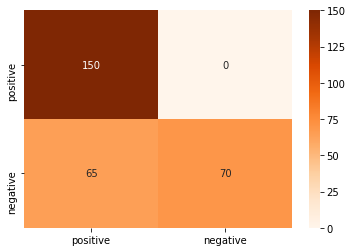

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test_5, pred_LR)
labels=['positive','negative']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test_5, pred_LR, average='macro') 
print(classification_report(Y_test_5, pred_LR))

# SVM

In [106]:
Y_train_4=Train4["m13"]

X_train_4=Train4.drop(['m13','loan_id'], axis=1)

Y_test_4=Test4["m13"]

X_test_4=Test4.drop(['m13','loan_id'], axis=1)

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_4)
X_test = sc_X.transform(X_test_4)

In [716]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='hinge')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
param_grid = {'alpha':alpha,'penalty':penalty}
knn_cv = GridSearchCV(clf, param_grid, cv=10,scoring='f1')
knn_cv.fit(X_train, Y_train_4) 
knn_cv.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [65]:
from sklearn import linear_model
from sklearn.calibration  import CalibratedClassifierCV
alpha_optimal_svm = linear_model.SGDClassifier(alpha=0.001,loss='hinge',penalty='l1')

alpha_optimal_svm.fit(X_train, Y_train_4)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score
# predict the response
pred_SVM = alpha_optimal_svm.predict(X_test)

precision = precision_score(Y_test_4, pred_SVM, average='macro')
recall = recall_score(Y_test_4, pred_SVM, average='macro')
f1 = f1_score(Y_test_4, pred_SVM, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(Y_test_4, pred_SVM))

Macro-average quality numbers
Precision: 0.8472, Recall: 0.7556, F1-measure: 0.7481
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       150
           1       1.00      0.51      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.85      0.76      0.75       285
weighted avg       0.84      0.77      0.75       285



[[150   0]
 [ 66  69]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       150
           1       1.00      0.51      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.85      0.76      0.75       285
weighted avg       0.84      0.77      0.75       285



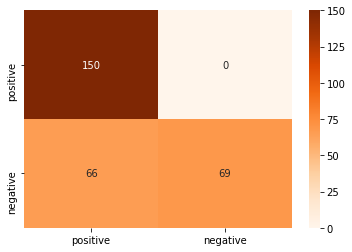

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test_4, pred_SVM)
labels=['positive','negative']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test_4, pred_SVM, average='macro') 
print(classification_report(Y_test_4, pred_SVM))

# Random Forest

In [110]:
features=Train3.drop(['m13','loan_id'], axis=1)

In [108]:
Y_train_3=Train3["m13"]

X_train_3=Train3.drop(['m13','loan_id'], axis=1)

Y_test_3=Test3["m13"]

X_test_3=Test3.drop(['m13','loan_id'], axis=1)

In [109]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_3)
X_test = sc_X.transform(X_test_3)

In [572]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [5, 10, 50, 100,150,200]
max_depth = [7,9, 10 ,13,15,17]
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
RF = RandomForestClassifier()
knn_cv = GridSearchCV(RF, param_grid, cv=10,scoring='f1',n_jobs=4)
knn_cv.fit(X_train, Y_train_3) 
knn_cv.best_params_

{'max_depth': 13,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 10}

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_depth=13,min_samples_leaf=7,min_samples_split=7)

# fitting the model
model_rf.fit(X_train, Y_train_3) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
from sklearn.metrics import precision_score,recall_score,f1_score
# predict the response
pred_rf = model_rf.predict(X_test)

precision = precision_score(Y_test_3, pred_rf, average='macro')
recall = recall_score(Y_test_3, pred_rf, average='macro')
f1 = f1_score(Y_test_3, pred_rf, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(Y_test_3, pred_rf))

Macro-average quality numbers
Precision: 0.8411, Recall: 0.7559, F1-measure: 0.7491
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       150
           1       0.99      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.84      0.76      0.75       285
weighted avg       0.83      0.77      0.75       285



[[149   1]
 [ 65  70]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       150
           1       0.99      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.84      0.76      0.75       285
weighted avg       0.83      0.77      0.75       285



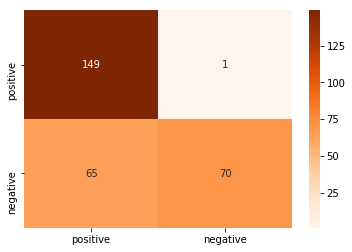

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test_4, pred_rf)
labels=['positive','negative']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test_3, pred_rf, average='macro') 
print(classification_report(Y_test_3, pred_rf))

In [576]:
import pandas as pd
imp_features=(dict(zip(features.columns, model_rf.feature_importances_)))
dictionary=dict(sorted(imp_features.items(), key=lambda kv: kv[1],reverse=True)[:20])
print(dictionary)

{'m12': 0.3134253829027248, 'm11': 0.12392245104587843, 'borrower_credit_score': 0.1220432320725225, 'm9': 0.1051303636368931, 'm10': 0.07250872597012471, 'm7': 0.05080499737341039, 'm8': 0.02821962678674022, 'debt_to_income_ratio': 0.026701411639580598, 'interest_rate': 0.025064677539976314, 'loan_to_value': 0.021591396239565654, 'co-borrower_credit_score': 0.021585696142382288, 'unpaid_principal_bal': 0.020964177608164002, 'financial_institution': 0.011912911714808525, 'm2': 0.009844204175628524, 'loan_term': 0.007396863187671262, 'm5': 0.0072139058563891025, 'insurance_type': 0.005965883703161838, 'source': 0.004850004949928667, 'number_of_borrowers': 0.004585953128363034, 'first_payment_date': 0.0044309361374554445}


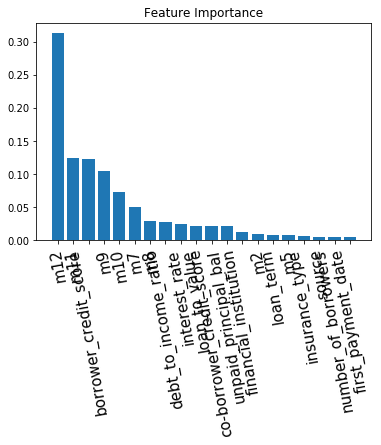

In [577]:
from matplotlib import pyplot
label=[]
label=(dictionary.keys())
values=(dictionary.values())
index = np.arange(len(label))
plt.bar(index, values)
plt.xticks(index, label, fontsize=15, rotation=100)
plt.title('Feature Importance')
plt.show()

# XGBClassifier

In [111]:
Y_train_2=Train2["m13"]

X_train_2=Train2.drop(['m13','loan_id'], axis=1)

Y_test_2=Test2["m13"]

X_test_2=Test2.drop(['m13','loan_id'], axis=1)

In [112]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_2)
X_test = sc_X.transform(X_test_2)

In [520]:
param_test1 = {
'n_estimators':[10,30,50,70,90],
 'max_depth':[10,30,50,70,90]
}

In [521]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=10)

gsearch1.fit(X_train, Y_train_2)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [10, 30, 50, 70, 90], 'max_depth': [10, 30, 50, 70, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [522]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 30, 'n_estimators': 90}, 0.8931378983039616)

In [77]:
from xgboost import XGBClassifier
XB_model = XGBClassifier(max_depth=30,n_estimators=90)
XB_model.fit(X_train, Y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=30, min_child_weight=1, missing=None,
       n_estimators=90, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [78]:
from sklearn.metrics import precision_score,recall_score,f1_score
# predict the response
XB = XB_model.predict(X_test)

precision = precision_score(Y_test_2, XB, average='macro')
recall = recall_score(Y_test_2, XB, average='macro')
f1 = f1_score(Y_test_2, XB, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(Y_test_2, XB))

Macro-average quality numbers
Precision: 0.8411, Recall: 0.7559, F1-measure: 0.7491
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       150
           1       0.99      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.84      0.76      0.75       285
weighted avg       0.83      0.77      0.75       285



[[149   1]
 [ 65  70]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       150
           1       0.99      0.52      0.68       135

   micro avg       0.77      0.77      0.77       285
   macro avg       0.84      0.76      0.75       285
weighted avg       0.83      0.77      0.75       285



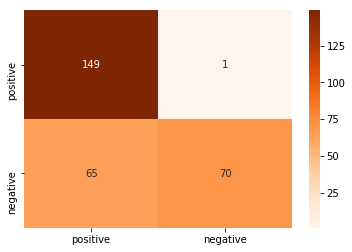

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test_2, XB)
labels=['positive','negative']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test_2, XB, average='macro') 
print(classification_report(Y_test_2, XB))

In [526]:
import pandas as pd
imp_features=(dict(zip(features.columns, XB_model.feature_importances_)))
dictionary=dict(sorted(imp_features.items(), key=lambda kv: kv[1],reverse=True)[:20])
print(dictionary)

{'m12': 0.6124373, 'm9': 0.11703211, 'm11': 0.02572241, 'm7': 0.022184923, 'm10': 0.020762522, 'm4': 0.018118814, 'm5': 0.016660081, 'm6': 0.016355699, 'm8': 0.012365744, 'm2': 0.011624595, 'loan_term': 0.010765451, 'm1': 0.010474211, 'borrower_credit_score': 0.00972593, 'co-borrower_credit_score': 0.009456412, 'financial_institution': 0.00879731, 'interest_rate': 0.008299901, 'origination_date': 0.008167644, 'loan_to_value': 0.0076872716, 'unpaid_principal_bal': 0.0076339324, 'source': 0.0075727324}


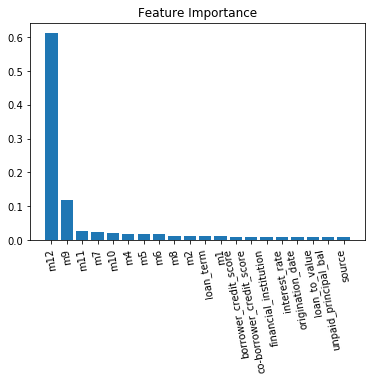

In [527]:
from matplotlib import pyplot
label=[]
label=(dictionary.keys())
values=(dictionary.values())
index = np.arange(len(label))
plt.bar(index, values)
plt.xticks(index, label, fontsize=10, rotation=100)
plt.title('Feature Importance')
plt.show()

# GradientBoostingClassifier

In [113]:
Y_train_2=Train2["m13"]

X_train_2=Train2.drop(['m13','loan_id'], axis=1)

Y_test_2=Test2["m13"]

X_test_2=Test2.drop(['m13','loan_id'], axis=1)

In [114]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_2)
X_test = sc_X.transform(X_test_2)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

In [622]:
#Choose all predictors except target & IDcols
param_grid = {'n_estimators':range(20,200,10)}
LR=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(LR, param_grid, cv=5,scoring='f1',n_jobs=4)
gsearch1.fit(X_train, Y_train_2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samp...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': range(20, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [623]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 190}, 0.798756937052019)

In [625]:
param_grid = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),'n_estimators':range(20,200,10)}
LR=(GradientBoostingClassifier(n_estimators=190,learning_rate=0.1, min_samples_split=200,min_samples_leaf=30,max_depth=15,subsample=0.8,random_state=10))
gsearch2 = GridSearchCV(LR, param_grid, cv=5,scoring='f1',n_jobs=4)
gsearch2.fit(X_train, Y_train_2)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 11, 'min_samples_split': 200, 'n_estimators': 190},
 0.8767571849783816)

In [83]:
GB=(GradientBoostingClassifier(n_estimators=190,learning_rate=0.05, min_samples_split=200,min_samples_leaf=40,max_depth=11,subsample=0.8,random_state=10))
GB.fit(X_train,Y_train_2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score
# predict the response
gb = GB.predict(X_test_2)

precision = precision_score(Y_test_2, gb, average='macro')
recall = recall_score(Y_test_2, gb, average='macro')
f1 = f1_score(Y_test_2, gb, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(Y_test_2, gb))

Macro-average quality numbers
Precision: 0.8456, Recall: 0.7519, F1-measure: 0.7437
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       150
           1       1.00      0.50      0.67       135

   micro avg       0.76      0.76      0.76       285
   macro avg       0.85      0.75      0.74       285
weighted avg       0.84      0.76      0.75       285



[[150   0]
 [ 67  68]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       150
           1       1.00      0.50      0.67       135

   micro avg       0.76      0.76      0.76       285
   macro avg       0.85      0.75      0.74       285
weighted avg       0.84      0.76      0.75       285



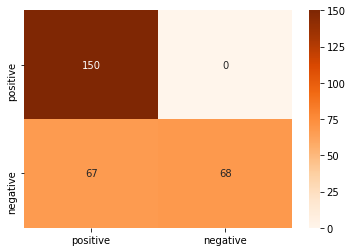

In [85]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas import DataFrame
from sklearn.metrics import f1_score
import seaborn as sn

confm = confusion_matrix(Y_test_2, gb)
labels=['positive','negative']
print(confm)
df_cm = DataFrame(confm, index=labels, columns=labels)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

f1_score(Y_test_2, gb, average='macro') 
print(classification_report(Y_test_2, gb))

# Test Data

In [115]:
test=pd.read_csv("test.csv")

In [116]:
list1=[]
for i in range(0,len(test)):
    string1=test["origination_date"][i]
    list1.append(string1[4])

test["origination_date"]=list1

list1=[]
for i in range(0,len(test)):
    string1=test["first_payment_date"][i]
    if(string1[0:3]=="Feb"):
        list1.append(2)
    elif(string1[0:3]=="Apr"):
        list1.append(4)
    elif(string1[0:3]=="Mar"):
        list1.append(3)  
    elif(string1[0:3]=="May"):
        list1.append(5)

test["first_payment_date"]=list1

test['origination_date'] = test['origination_date'].astype(int)
test['first_payment_date'] = test['first_payment_date'].astype(int)

test["orgin-first"]=test["first_payment_date"]-test["origination_date"]

In [117]:
le_X = LabelEncoder()

X = test.iloc[:,1].values

X = le_X.fit_transform(X)

y = test.iloc[:,2].values

y = le_X.fit_transform(y)

z = test.iloc[:,12].values

z = le_X.fit_transform(z)

a = test.iloc[:,15].values

a = le_X.fit_transform(z)

test['source']=X

test['financial_institution']=y

test['loan_purpose']=z

test['insurance_type']=a

In [118]:
X_test1=test.drop(['loan_id'], axis=1)

In [119]:
X_test1 = sc_X.transform(X_test1)

In [92]:
pred_LR = alpha_optimal.predict(X_test1)

pred_SVM = alpha_optimal_svm.predict(X_test1)

pred_RF = model_rf.predict(X_test1)

pred_XG = XB_model.predict(X_test1)

pred_GB = GB.predict(X_test1)

In [93]:
df_all = pd.DataFrame(columns=['pred_SVM','pred_GB','pred_RF'])

In [94]:
df_all['pred_GB']=pred_GB
df_all['pred_RF']=pred_RF
df_all['pred_SVM']=pred_SVM

# Majority Voting

In [95]:
df_all["final"]=df_all.mode(axis=1)

In [96]:
df1 = pd.DataFrame(columns=['loan_id','m13'])

In [97]:
df1["m13"]=df_all["final"]

In [98]:
df1["loan_id"]=test['loan_id']

In [99]:
df1.to_csv("final.csv",index=0)

In [100]:
df1["m13"].value_counts()

0    35641
1      225
Name: m13, dtype: int64